# Lab 3

VARAD TUPE: 50249001

KRITHIKA KRISHNAN: 50169047

## Part 1: Titanaic data analysis using Spark
#### classified.csv, output of the titanic data analysis can be found in part 1 folder. Analysed using Scala and Pyspark. 

## Part 2: NY Times Article Classification using Spark
### Flow diagram of data pipeline:

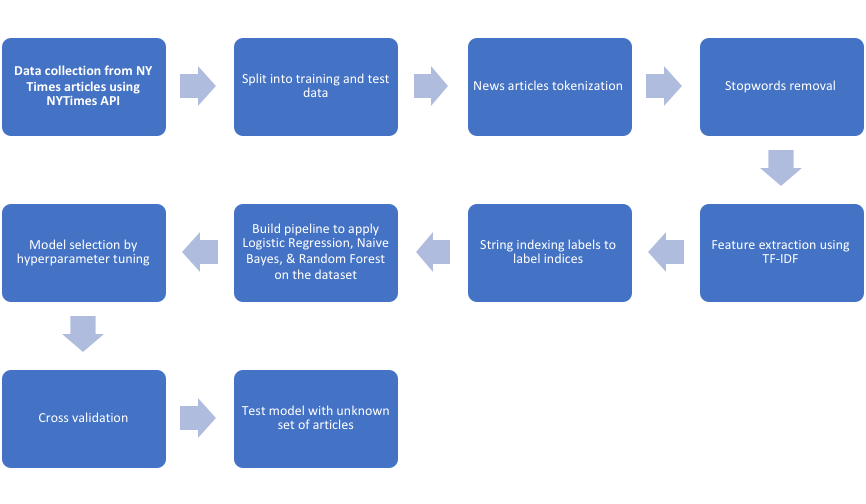

In [31]:
from IPython.display import Image
Image(filename='piplieneBlock.png')

## Data Extraction
NY times article API was used to extract url's from the NY times website. Beautiful soup package was used to scrap the articles through the url's to get the article text. 

Articles were extracted from four different topics. 


* Politics

* Sports

* Business 

* Music

## **The total count of the articles collected were 535.**


Loaded the dataframe containing the text of the article with the labels provided into a pickle file, "trainingCV.pickle". 
Collected separate articles for query into a separate pickle file, "searchData.pickle". 

Given the scale of data, we found it better to store the articles in the form of lists dumped into pickle files. This helped us load the data into a spark dataframe.

The spark context was created to load the dataframe. 
Divided the input data into training and test: 80% and 20% respectively. 

Usage of MLlib package (Spark’s core ML library) for performing the extraction, tranformation of features, application of machine learning algorithms, and to cross validate, tune the model. 

## Tokenized articles
Process of considering the text and breaking it down into individual terms. 
Function, "tokenizer" takes input as article and gives output as words with the help of tokenizer class.  


## Stopwords removal
Takes input of a sequence of strings which is obtained from the tokenized articles and gives a filtered output. 


## Feature extraction using TF-IDF 

Term frequency-inverse document frequency (TF-IDF) is a feature vectorization method widely used in text mining to reflect the importance of a term to a document. 

A term is denoted by t, a document by d, and the input text by D. Term frequency TF(t,d) is the number of times that term t appears in document d, while document frequency DF(t,D) is the number of documents that contains term t. 

$$IDF(t, D) = \log \frac{|D| + 1}{DF(t, D) + 1}$$

|D| is the total number of documents in the given input text.

The TF-IDF measure is simply the product of TF and IDF: 

$$TFIDF(t, d, D) = TF(t, d) \cdot IDF(t, D)$$

The number of features taken for the extraction is varied from 10, 100, to 1000.

## String indexing labels to label indices
StringIndexer encodes a string column of labels to a column of label indices. The indices are in [0, numLabels), ordered by label frequencies, so the most frequent label gets index 0. IndexToString maps a column of label indices back to a column containing the original labels as strings.

## Machine learning algorithms used
* **Logistic regression**

    Multinomial logistic (softmax) reression is applied to perform multiclass classification. It creates a matrix of dimension K×J where K is the number of outcome classes and J is the number of features. If the algorithm is fit with an intercept term then we obtain a length K vector of intercepts. The conditional probabilities of the outcome classes k∈1,2,…,K are modeled using the softmax function.
    
    $$P(Y=k|\mathbf{X}, \boldsymbol{\beta}_k, \beta_{0k}) =  \frac{e^{\boldsymbol{\beta}_k \cdot \mathbf{X}  + \beta_{0k}}}{\sum_{k'=0}^{K-1} e^{\boldsymbol{\beta}_{k'} \cdot \mathbf{X}  + \beta_{0k'}}}$$
    
* **Naive bayes**

Naive bayes classifier algorithm is applied based on the priors of the features considered to be independent of each other. 

* **Random forest**

They are ensembles of decision trees. Random forests train a set of decision trees separately, so the training can be done in parallel. The algorithm injects randomness into the training process so that each decision tree is a bit different. Combining the predictions from each tree reduces the variance of the predictions, improving the performance on test data.


## Model selection: hyperparameter tuning, cross validation

In this section, model selection is performed to find the best model or parameters for a given task. 
Tuning may be done for individual Estimators such as LogisticRegression, or for entire Pipelines which include multiple algorithms, featurization, and other steps.




## Testing with query articles

### Evaluation metrics: 

#### Confusion matrix 
$$C_{ij} = \sum_{k=0}^{N-1} \hat{\delta}(\mathbf{y}_k-\ell_i) \cdot \hat{\delta}(\hat{\mathbf{y}}_k - \ell_j)\\ \\
         \left( \begin{array}{ccc}
         \sum_{k=0}^{N-1} \hat{\delta}(\mathbf{y}_k-\ell_1) \cdot \hat{\delta}(\hat{\mathbf{y}}_k - \ell_1) & \ldots &
         \sum_{k=0}^{N-1} \hat{\delta}(\mathbf{y}_k-\ell_1) \cdot \hat{\delta}(\hat{\mathbf{y}}_k - \ell_N) \\
         \vdots & \ddots & \vdots \\
         \sum_{k=0}^{N-1} \hat{\delta}(\mathbf{y}_k-\ell_N) \cdot \hat{\delta}(\hat{\mathbf{y}}_k - \ell_1) & \ldots &
         \sum_{k=0}^{N-1} \hat{\delta}(\mathbf{y}_k-\ell_N) \cdot \hat{\delta}(\hat{\mathbf{y}}_k - \ell_N)
         \end{array} \right)$$
         
         
#### Accuracy 
$$ACC = \frac{TP}{TP + FP} = \frac{1}{N}\sum_{i=0}^{N-1} \hat{\delta}\left(\hat{\mathbf{y}}_i -
        \mathbf{y}_i\right)$$
        
#### Precision by label
$$PPV(\ell) = \frac{TP}{TP + FP} =
          \frac{\sum_{i=0}^{N-1} \hat{\delta}(\hat{\mathbf{y}}_i - \ell) \cdot \hat{\delta}(\mathbf{y}_i - \ell)}
          {\sum_{i=0}^{N-1} \hat{\delta}(\hat{\mathbf{y}}_i - \ell)}$$

#### F1-Score/ F-measure by label
$$F(\beta, \ell) = \left(1 + \beta^2\right) \cdot \left(\frac{PPV(\ell) \cdot TPR(\ell)}
          {\beta^2 \cdot PPV(\ell) + TPR(\ell)}\right)$$

#### Recall by label
$$TPR(\ell)=\frac{TP}{P} =
          \frac{\sum_{i=0}^{N-1} \hat{\delta}(\hat{\mathbf{y}}_i - \ell) \cdot \hat{\delta}(\mathbf{y}_i - \ell)}
          {\sum_{i=0}^{N-1} \hat{\delta}(\mathbf{y}_i - \ell)}$$

#### Weighted F-measure
$$F_{w}(\beta)= \frac{1}{N} \sum\nolimits_{\ell \in L} F(\beta, \ell)
          \cdot \sum_{i=0}^{N-1} \hat{\delta}(\mathbf{y}_i-\ell)$$
          

### Import the libraries needed for program to run

In [32]:
import requests 
from bs4 import BeautifulSoup 
session = requests.Session() 
import datetime 
import pandas as pd 
import time  

### mainList would hold all articles in form of dictionary

[{'article' : '.....',
  'label' : 'business'
  'url' : 'aricleURL'},{},{},.....]


In [21]:
mainList = [] 

def NYDataCollect(searchword): 
    url = "http://api.nytimes.com/svc/search/v2/articlesearch.json?q="+searchword+"&api-key=212fe9ffc7be4f99b8c82341ceed2e03&begin_date=20130101" 
    r = requests.get(url) 
    data = r.json() 
    # print(data) 
    return data["response"]["docs"] 

In [22]:
def urlCollector(inpData): 
    urlList = [] 
    for i in inpData: 
        urlList.append(i["web_url"]) 
    return urlList 

In [23]:
def articleText(url,folder): 
    try: 
        #print("Inside articleText") 
        req = session.get(url) 
        soup = BeautifulSoup(req.text,"lxml")         
        paragraphs = soup.find_all('p', class_='story-body-text story-content')         
        #print(paragraphs)
        article = "" 
        for i in paragraphs: 
            article = article + i.get_text() 
        #print(article) 
        
        #writeToFile(article,"nyData",folder) 
        #articleObj = {'article':article,'label':#der,'url':url} 

        articleObj = {'article':article,'label':folder} 

        if article != '': 
            mainList.append(articleObj)
            print("Article found",len(mainList))
        else:
            print("Blank article",len(mainList))
    except: 
        print("url problem for " + url) 

In [24]:
 def writeToFile(inpStr,folder,subfolder): 
    #print("Inside writeToFile") 
    filename = "./"+ folder+ "/"+ subfolder+ "/article_" + datetime.datetime.fromtimestamp(time.time()).strftime('%Y_%m_%d_%H_%M_%S') + ".txt" 
    print(filename) 
    dFile= open(filename,"w") 
    dFile.write(inpStr) 
    dFile.close()

In [25]:
def getNYDataByTopic(topic,folder): 
    data = NYDataCollect(topic) 
    urls = urlCollector(data) 
    for i in urls: 
        print(i) 
        articleText(i,folder)          

In [26]:
pd.DataFrame(mainList)  
mainList 

[]

In [27]:
politics = ['politics' ,'government' ,'cabinet','democrats','republicans', 'elections', 'law','president trump' ,'gop' ,'senate','trump administration' ,'Electorate'] 
business = ['finance','stock','markets', 'accounts','profit','economy', 'stock','money', 'trade', 'startups', 'wall', 'street', 'financial'] 
sports = 'tennis,football,basketball,soccer,golf,gymnastics,hockey,baseball,games,nfl,sports'.split(",") 
music = 'songlist song music concerts classical hip-hop jazz album singer songwriter grammy playlist'.split() 

In [28]:
business

['finance',
 'stock',
 'markets',
 'accounts',
 'profit',
 'economy',
 'stock',
 'money',
 'trade',
 'startups',
 'wall',
 'street',
 'financial']

In [10]:
sports

['tennis',
 'football',
 'basketball',
 'soccer',
 'golf',
 'gymnastics',
 'hockey',
 'baseball',
 'games',
 'nfl',
 'sports']

In [11]:
music
politics

['politics',
 'government',
 'cabinet',
 'democrats',
 'republicans',
 'elections',
 'law',
 'president trump',
 'gop',
 'senate',
 'trump administration',
 'Electorate']

### Fetching the data

In [29]:
for i in business: 
    getNYDataByTopic(i,"Business") 

https://www.nytimes.com/2018/04/13/business/a-personal-finance-book-based-on-happiness-instead-of-money.html
Article found 1
https://www.nytimes.com/reuters/2018/04/27/business/27reuters-brewin-dolphin-financedirector.html
Article found 2
https://www.nytimes.com/2018/04/12/us/national-enquirer-doorman-trump.html
Article found 3
https://www.nytimes.com/2018/02/23/smarter-living/year-of-less.html
Article found 4
https://www.nytimes.com/2018/04/09/opinion/finance-isnt-just-for-fat-cats.html
Blank article 4
https://www.nytimes.com/reuters/2018/05/07/world/europe/07reuters-russia-government-siluanov-finmin.html
Article found 5
https://www.nytimes.com/reuters/2018/05/07/world/europe/07reuters-russia-government-siluanov.html
Article found 6
https://www.nytimes.com/reuters/2018/05/06/world/europe/06reuters-europe-eurozone-germany.html
Article found 7
https://www.nytimes.com/reuters/2018/05/03/business/03reuters-france-reforms-pensions.html
Article found 8
https://www.nytimes.com/reuters/2018/0

In [30]:
for i in politics: 
    getNYDataByTopic(i,"Politics") 
    

https://www.nytimes.com/2018/03/21/opinion/australia-office-sex-barnaby.html
Blank article 98
https://www.nytimes.com/2018/03/21/arts/design/italian-art-fondazione-prada-palazzo-strozzi.html
Article found 99
https://www.nytimes.com/2018/05/04/us/politics/trump-politics-weekly-roundup.html
Blank article 99
https://www.nytimes.com/2018/04/27/us/politics/politics-news-round-up.html
Blank article 99
https://www.nytimes.com/2018/04/06/us/politics/news-round-up.html
Blank article 99
https://www.nytimes.com/2018/04/03/us/politics/women-campaign-managers-midterms.html
Article found 100
https://www.nytimes.com/2018/04/11/opinion/islam-feminism-third-way.html
Blank article 100
https://www.nytimes.com/2017/11/11/opinion/sunday/the-power-of-the-courts-is-messing-up-politics.html
Blank article 100
https://www.nytimes.com/2018/04/09/magazine/donald-trump-rallies-campaigning-president.html
Article found 101
https://www.nytimes.com/2018/04/21/us/politics/the-biggest-stories-in-american-politics-this-w

In [31]:
for i in music: 
    getNYDataByTopic(i,"Music") 
    

https://artsbeat.blogs.nytimes.com/2013/12/09/strong-week-for-broadways-carole-king-show-still-in-previews/
Blank article 162
https://www.nytimes.com/2013/03/24/arts/television/whats-on-sunday.html
Article found 163
https://www.nytimes.com/2017/11/14/movies/song-of-granite-review.html
Article found 164
https://www.nytimes.com/2018/04/28/opinion/sunday/gaming-the-system.html
Blank article 164
https://www.nytimes.com/2018/04/17/crosswords/daily-puzzle-2018-04-18.html
Article found 165
https://www.nytimes.com/aponline/2018/04/30/arts/ap-us-music-cashs-words.html
Article found 166
https://www.nytimes.com/2018/02/20/theater/harvey-fierstein-torch-song-broadway.html
Article found 167
https://www.nytimes.com/aponline/2018/05/04/world/europe/ap-eu-portugal-eurovision.html
Article found 168
https://www.nytimes.com/2018/04/11/style/judy-collins-marriage-louis-nelson.html
Article found 169
https://www.nytimes.com/aponline/2018/04/29/us/ap-us-alices-restaurant-church.html
Article found 170
https:/

In [32]:
for i in sports: 
    getNYDataByTopic(i,"Sports") 

https://www.nytimes.com/2018/04/27/sports/tennis/serena-williams.html
Blank article 237
https://www.nytimes.com/2018/03/16/sports/tennis/davis-cup.html
Article found 238
https://www.nytimes.com/2018/03/20/sports/tennis/roger-federer-laver-cup-chicago.html
Article found 239
https://www.nytimes.com/2018/03/14/sports/tennis/indian-wells-daria-kasatkina.html
Article found 240
https://www.nytimes.com/2018/01/29/sports/tennis/serena-williams-australian-open.html
Article found 241
https://www.nytimes.com/2018/01/24/sports/tennis/hyeon-chung-australian-open.html
Article found 242
https://www.nytimes.com/2018/01/12/sports/tennis/season-lookahead-2018.html
Article found 243
https://www.nytimes.com/2018/01/19/sports/tennis/australian-open-backward-cap.html
Article found 244
https://www.nytimes.com/2018/04/25/sports/tennis/tennis-anti-corruption-report.html
Article found 245
https://www.nytimes.com/2018/02/26/sports/tennis/davis-cup-itf-pique.html
Article found 246
https://www.nytimes.com/2018/04/

### Check the data stats

In [33]:
mainDF = pd.DataFrame(mainList) 
#mainList

In [34]:
mainDF.groupby('label').count() 

article
label            
Business       98
Music          75
Politics       64
Sports         99

### Dump the data into pickle file

In [36]:
import pickle 
a = {"DF":mainList} 

In [37]:
# creating a pickle file to hold the training and test dataset 
with open('trainingCV.pickle', 'wb') as handle: 
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL) 

### Also dumping extra articles for testing the models used in the  News article classification part below

In [39]:
# query articles 
with open('searchData.pickle', 'wb') as handle: 
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL) 

# NY Times news article classifier

## Data Flow:
* Loading data in memory
    * Load data from pickle file
    * Shuffle data
    * Load data into Spark dataframe
    * Split data into training and test set
* Pipeline
    * Tokenize
    * Remove stop words
    * Apply TF-IDF
    * Convert string labels into index
    * Apply ML algorithm (Logistic Regression, Naive Bayes, Random Forest)
    * Convert prediction index back to labels
* Cross validation
    * Use Param grid builder to add hyperparameters for each of algorithm
* Evaluation
    * Get confusion matrix
    * Calculate following metrics:
        * Precision
        * F1-Score
        * Recall
        * Weighted False positive rate
* Use Query data and perform evaluation on that

In [15]:
# Imports
from pyspark.ml import Pipeline 

# Classification algorithms
from pyspark.ml.classification import LogisticRegression 
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import RandomForestClassifier

# Evaluations
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from sklearn.metrics import confusion_matrix

# Data pre-processers and Feature selections
from pyspark.ml.feature import HashingTF, IDF, Tokenizer 
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import OneHotEncoder, IndexToString, StringIndexer, VectorIndexer, VectorAssembler

# Model tuning
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

# Spark
from pyspark import SparkContext 
from pyspark.sql.functions import col
from pyspark import SQLContext 

# Other
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pickle
import random

In [3]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Load data from pickle file

In [20]:
import pickle

In [21]:
# Import Pickle
with open('trainingCV.pickle', 'rb') as handle: 
    b = pickle.load(handle) 
    
listData = b['DF']    
random.shuffle(listData)
random.shuffle(listData)

### Creating spark context

In [16]:
# Create Spark Comtext
sc = SparkContext.getOrCreate() 
spark = SQLContext(sc) 

### Loading data into Spark Data frame

In [6]:
# Load Data in spark data frame 
sentenceData = spark.createDataFrame(listData)

/home/krithika/anaconda3/lib/python3.6/site-packages/pyspark/sql/session.py:340: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


In [7]:
# Rename column label since label is used in further down pipeline
sentenceData = sentenceData.withColumnRenamed("label","category")

### Total Data Count

In [8]:
sentenceData.count()

336

### Removing duplicate articles

In [9]:
sentenceData = sentenceData.distinct()
sentenceData.count()

317

### Group by label catergory

In [10]:
# Data group by count
sentenceData.groupBy("category") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------+-----+
|category|count|
+--------+-----+
|  Sports|   99|
|Business|   87|
|   Music|   69|
|Politics|   62|
+--------+-----+



### Spliting data into training and test set

In [11]:
# Train Test split
training, test = sentenceData.randomSplit([0.8, 0.2], seed=12345)

In [12]:
# Show train data
training.show()

+--------------------+--------+
|             article|category|
+--------------------+--------+
|AUGUSTA, Ga. — Al...|  Sports|
|Levi Strauss & Co...|   Music|
|Investors seemed ...|Business|
|The warning is ta...|  Sports|
|WASHINGTON —  Cal...|Politics|
|KONGENS LYNGBY, D...|  Sports|
|NEW ORLEANS —  In...|   Music|
|Our guide to the ...|   Music|
|The publisher of ...|Business|
|(Reuters) - U.S. ...|Business|
|PARIS —  France w...|Business|
|KIEV —  Ukraine's...|Business|
|NEW YORK —  With ...|  Sports|
|(Reuters) - Healt...|Politics|
|The national trai...|  Sports|
|LISBON, Portugal ...|   Music|
|Professional tenn...|  Sports|
|The number of job...|  Sports|
|We recently reach...|  Sports|
|A bipartisan grou...|  Sports|
+--------------------+--------+
only showing top 20 rows



## Feature Engineering

### Initializing objects required for pipeline

In [34]:
# Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and lr. 

tokenizer = Tokenizer(inputCol="article",
                      outputCol="words") 

remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), 
                           outputCol="filtered")

hashingTF = HashingTF(inputCol=remover.getOutputCol(), 
                      outputCol="hashFeatures") 

idf = IDF(inputCol=hashingTF.getOutputCol(),
          outputCol="features")

label_stringIdx = StringIndexer(inputCol = "category", 
                                outputCol = "label").fit(training)


labelConverter = IndexToString(inputCol="prediction", 
                               outputCol="predictedLabel",
                               labels=label_stringIdx.labels)

featureIndexer = VectorIndexer(inputCol="features", 
                              outputCol="indexedFeatures",
                              maxCategories=4)


# ML Algorithms

rf = RandomForestClassifier(labelCol="label",
                            featuresCol="features")

nb = NaiveBayes(modelType="multinomial")

lr = LogisticRegression(maxIter=10, 
                        family="multinomial") 

### Piplnes for multiple ML Algorithms

In [35]:
# Pipelines

# Logistic Regression
pipeline_LR = Pipeline(stages=[tokenizer,remover, hashingTF,idf, label_stringIdx, lr,labelConverter]) 

# Random Forest
pipeline_RF = Pipeline(stages=[tokenizer,remover, hashingTF,idf, label_stringIdx, rf,labelConverter]) 

# Naive Bayes
pipeline_NB = Pipeline(stages=[tokenizer,remover, hashingTF,idf, label_stringIdx, nb,labelConverter]) 

# We now treat the Pipeline as an Estimator, wrapping it in a CrossValidator instance. 

# This will allow us to jointly choose parameters for all Pipeline stages. 

# A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator. 

# We use a ParamGridBuilder to construct a grid of parameters to search over. 

# With 3 values for hashingTF.numFeatures and 2 values for lr.regParam, 

# this grid will have 3 x 2 = 6 parameter settings for CrossValidator to choose from. 


### Cross-validation parameters initialization

In [36]:
# Cross validation


# Logistic Regression
paramGrid_LR = ParamGridBuilder() \
    .addGrid(hashingTF.numFeatures, [10, 100, 1000]) \
    .addGrid(lr.regParam, [0.01, 0.05, 0.1]) \
    .build()

crossval_LR = CrossValidator(estimator=pipeline_LR, 
                          estimatorParamMaps=paramGrid_LR, 
                          evaluator=MulticlassClassificationEvaluator(), 
                          numFolds=5)  

In [37]:
# Naive Bayes

paramGrid_NB = ParamGridBuilder() \
    .addGrid(hashingTF.numFeatures, [10, 100, 1000]) \
    .addGrid(nb.smoothing, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]) \
    .build()
    
crossval_NB = CrossValidator(estimator=pipeline_NB, 
                          estimatorParamMaps=paramGrid_NB, 
                          evaluator=MulticlassClassificationEvaluator(), 
                          numFolds=5) 

In [38]:
# Random Forest

paramGrid_RF = ParamGridBuilder() \
    .addGrid(hashingTF.numFeatures, [10, 100, 1000]) \
    .addGrid(rf.numTrees, [10, 100, 500]) \
    .build()
    
crossval_RF = CrossValidator(estimator=pipeline_RF, 
                          estimatorParamMaps=paramGrid_RF, 
                          evaluator=MulticlassClassificationEvaluator(), 
                          numFolds=5)  

### Model fitting

In [39]:
#Fit data for Logistic Regression
cvModel_LR = crossval_LR.fit(training) 

In [40]:
#Fit data for Naive Bayes
cvModel_NB = crossval_NB.fit(training) 

In [41]:
#Fit data for Logistic Regression
cvModel_RF = crossval_RF.fit(training)

### Evaluation

#### Reusable function for getting the data accuracy for the model

* Precision: #True positives/ (#True positives+ #False positives)

* Recall: #True positives/(#True positives + #False negatives)

* F-score: mean of precision and accuracy = 2*precision*recall/(precision+recall)

In [1]:
def getStats(model,inpData):
    # Prediction

    #Logistic Regression
    prediction = model.transform(inpData) 
    predictionAndLabel = prediction.select("prediction", "label").rdd
    npLbl = np.array(prediction.select( "label").collect(),dtype=int)
    npPred = np.array(prediction.select("prediction").collect(),dtype=int)
    metrics = MulticlassMetrics(predictionAndLabel)
    plot_confusion_matrix(cm           = confusion_matrix(npLbl,npPred), 
                          normalize    = False,
                          target_names = label_stringIdx.labels,
                          title        = "Confusion Matrix")
    print("Precision :",metrics.precision()) # precision
    print("F-Score :",metrics.fMeasure()) # f1 score
    print("Recall :",metrics.recall()) # recall
    print("Weighted False Positive Rate :",metrics.weightedFalsePositiveRate) # false positive rate

### Logistic Regression 

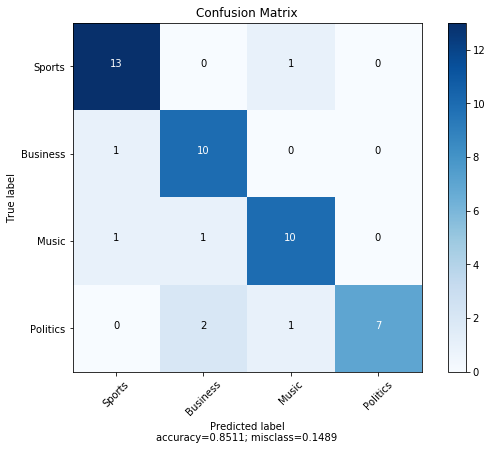

Precision : 0.851063829787234
F-Score : 0.851063829787234
Recall : 0.851063829787234
Weighted False Positive Rate : 0.05214608086948513


In [66]:
getStats(cvModel_LR,test)

### Naive Bayes

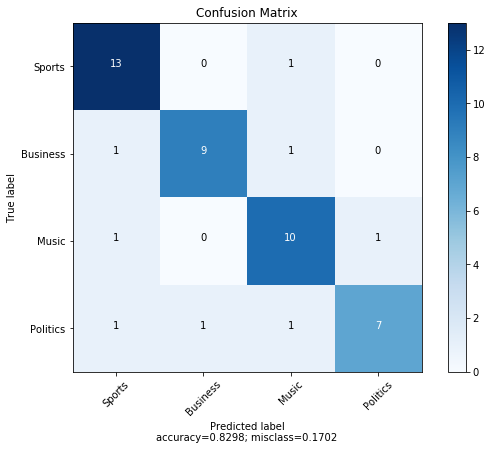

Precision : 0.8297872340425532
F-Score : 0.8297872340425532
Recall : 0.8297872340425532
Weighted False Positive Rate : 0.06121541547073461


In [65]:
getStats(cvModel_NB,test)

### Random Forest

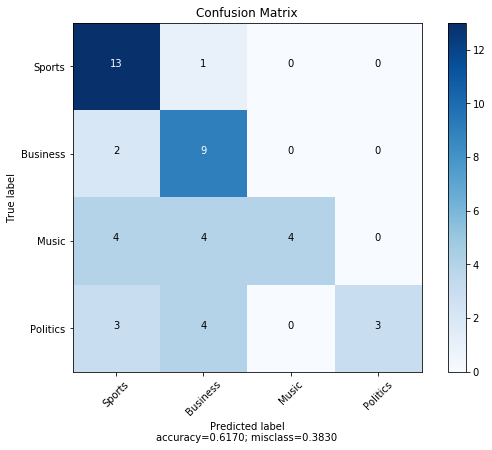

Precision : 0.6170212765957447
F-Score : 0.6170212765957447
Recall : 0.6170212765957447
Weighted False Positive Rate : 0.1397485493230174


In [54]:
getStats(cvModel_RF,test)

## Testing on query data

In [55]:
# Import new Search Data
with open('searchData.pickle', 'rb') as handle: 
    u = pickle.load(handle) 

listDataNew = u['DF']
random.shuffle(listDataNew)
random.shuffle(listDataNew)

In [56]:
# Load Data in spark data frame 
searchData = spark.createDataFrame(listDataNew)

# Rename column label since label is used in further down pipeline
searchData = searchData.withColumnRenamed("label","category")
searchData.count()

/home/krithika/anaconda3/lib/python3.6/site-packages/pyspark/sql/session.py:340: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


218

### Performance of models on query data

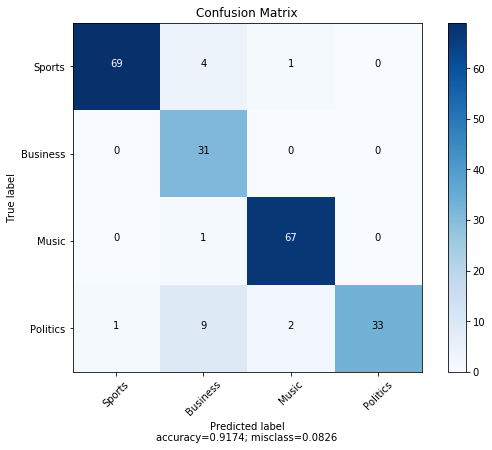

Precision : 0.9174311926605505
F-Score : 0.9174311926605505
Recall : 0.9174311926605505
Weighted False Positive Rate : 0.01924194726542271


In [57]:
# Logistic Regression
getStats(cvModel_LR,searchData)

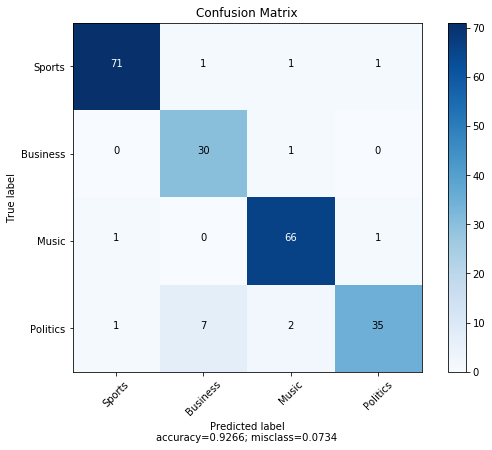

Precision : 0.926605504587156
F-Score : 0.926605504587156
Recall : 0.926605504587156
Weighted False Positive Rate : 0.02150250244743162


In [58]:
# Naive Bayes
getStats(cvModel_NB,searchData)

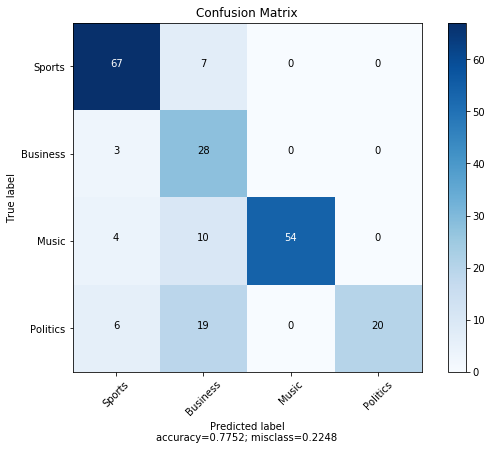

Precision : 0.7752293577981652
F-Score : 0.7752293577981652
Recall : 0.7752293577981652
Weighted False Positive Rate : 0.058020504559900134


In [59]:
# Random Forest
getStats(cvModel_RF,searchData)

After several iterations of changing the hyperparameters to tune the model, accuracy results of the three methods, logistic regression, naive bayes, and random forest varied across the algorithms. 

## Results of metrics

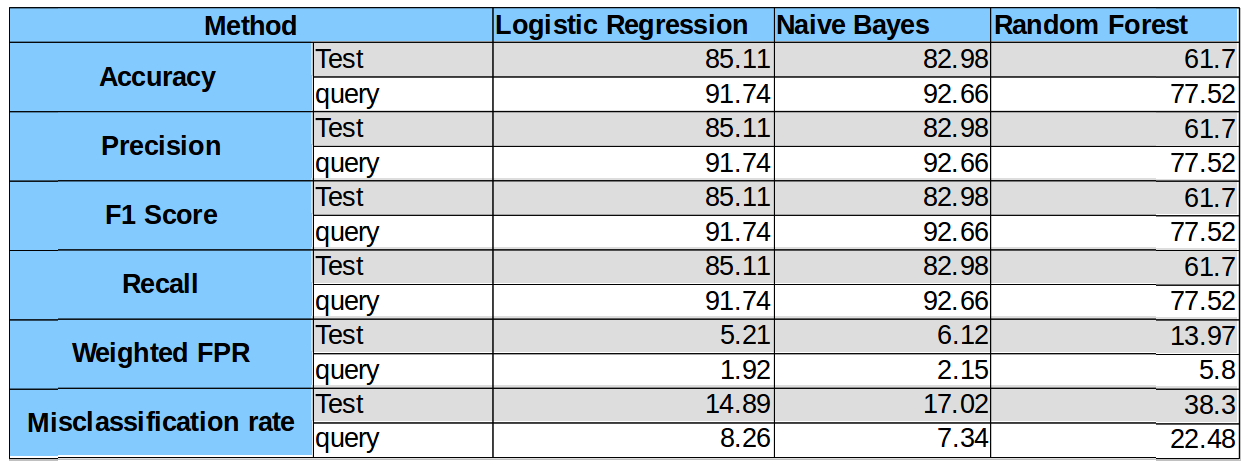

In [67]:
Image(filename='metrics.png')

## Discussion

* Logistic regression performed well as compared to random forest. The amount to which the data points/ articles were classified wrongly have been displayed with the confusion matrix and misclassification rate. Logistic regression classifies better than the other two methods. 


* This indicates that the logistic regression classifies articles better to the nature of the data. The softmax logistic function classifies the words pretty well based on the features derived from the term frequency-inverse frequency. This good performance of this classifier could be due to the fact that logistic regression performs well when the sample number is much larger than the feature number. 


* Naive bayes relies high on the information learnt on the training data and there is a heavy assumption on the independence of the features. Naive bayes performs relatively well as compared to random forest and a little less than logistic regression. This could indicate the independence of the features. They seem to work well in this text classification problem. 


* Random forest is not able to fit well due to the possible scattered nature of the data. The decision trees don't seem to work well in this high sparse dimension. 
Random forest does not fit so well due to the nature of the algorithm to make decision trees. It fails to classify the words based on the given features. 


* It combines several decision trees to prevent overfitting. 
The tree predicts the same label for each bottommost (leaf) partition. Each partition is chosen greedily by selecting the best split from a set of possible splits, in order to maximize the information gain at a tree node. This in case affects the classification accuracy. 